<a href="https://colab.research.google.com/github/cweikucf/cap4630/blob/master/HW_2/ConnerWeik_CAP4630_Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conner Weik
# CAP 4630, Spring 2020
# Homework 2

# Imports

In [1]:
# Imports and stuff
%matplotlib inline
%tensorflow_version 2.x
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
plt.style.use('seaborn-white')

TensorFlow 2.x selected.


#Problem 1

## f1 and p1

f1 and p1 are as follows.

f1 = $\mathrm{cos(x) * cos(y) * (10 - \sqrt{x^2} - \sqrt{y^2})}$

p1 = (0, 0, 10)

In [0]:
# Function definition and getting the x, y, and z values

def f1(x,y):
  return np.cos(x) * np.cos(y) * (10 - np.sqrt(x ** 2) - np.sqrt(y ** 2))

x_f1 = np.linspace(-5, 5)
y_f1 = np.linspace(-5, 5)

X_f1, Y_f1 = np.meshgrid(x_f1, y_f1)
Z_f1 = f1(X_f1, Y_f1)

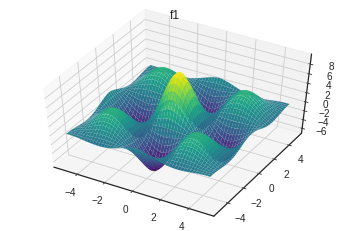

In [3]:
# 3D Plot
ax_f1 = plt.axes(projection='3d')
ax_f1.plot_surface(X_f1, Y_f1, Z_f1, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax_f1.set_title('f1');

ax_f1.view_init(50)

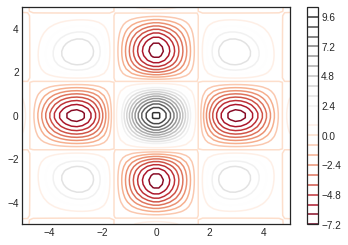

In [4]:
# Contour Plot
plt.contour(X_f1, Y_f1, Z_f1, 20, cmap='RdGy');
plt.colorbar();

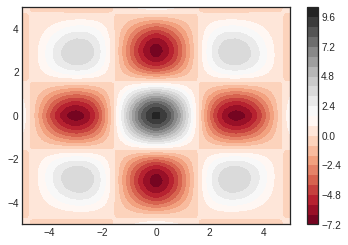

In [5]:
# Density Plot
plt.contourf(X_f1, Y_f1, Z_f1, 20, cmap='RdGy')
plt.colorbar();

## f2 and p2

f2 and p2 are as follows.

f1 = $\mathrm{x^2 + y^2}$

p1 = (0, 0, 0)

In [0]:
# Function definition and getting the x, y, and z values

def f2(x,y):
  return x ** 2 + y ** 2

x_f2 = np.linspace(-10, 10)
y_f2 = np.linspace(-10, 10)

X_f2, Y_f2 = np.meshgrid(x_f2, y_f2)
Z_f2 = f2(X_f2, Y_f2)

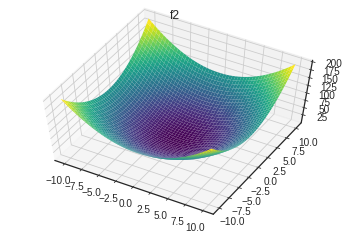

In [7]:
# 3D Plot
ax_f2 = plt.axes(projection='3d')
ax_f2.plot_surface(X_f2, Y_f2, Z_f2, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax_f2.set_title('f2');

ax_f2.view_init(60)

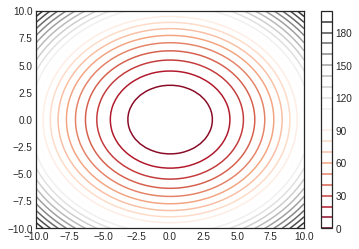

In [8]:
# Contour Plot
plt.contour(X_f2, Y_f2, Z_f2, 20, cmap='RdGy');
plt.colorbar();

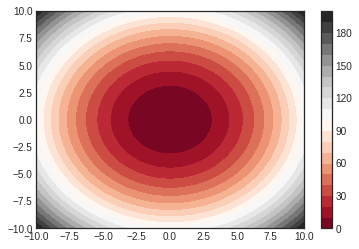

In [9]:
# Density Plot
plt.contourf(X_f2, Y_f2, Z_f2, 20, cmap='RdGy')
plt.colorbar();

## f3 and p3

f2 and p2 are as follows.

f1 = $\mathrm{x^3y^3}$

p1 = (0, 0, 0)

In [0]:
# Function definition and getting the x, y, and z values

def f3(x,y):
  return (x ** 3) * (y ** 3)

x_f3 = np.linspace(-1, 1)
y_f3 = np.linspace(-1, 1)

X_f3, Y_f3 = np.meshgrid(x_f3, y_f3)
Z_f3 = f3(X_f3, Y_f3)

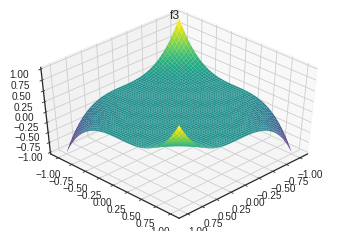

In [11]:
# 3D Plot
ax_f3 = plt.axes(projection='3d')
ax_f3.plot_surface(X_f3, Y_f3, Z_f3, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax_f3.set_title('f3');

ax_f3.view_init(45, 45)

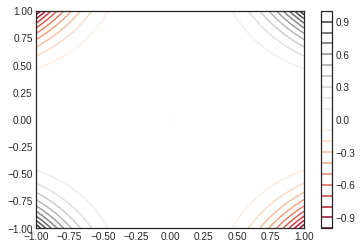

In [12]:
# Contour Plot
plt.contour(X_f3, Y_f3, Z_f3, 20, cmap='RdGy');
plt.colorbar();

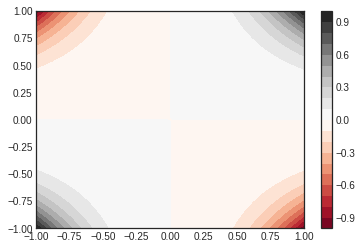

In [13]:
# Density Plot
plt.contourf(X_f3, Y_f3, Z_f3, 20, cmap='RdGy')
plt.colorbar();

# Problem 2

For this problem, the plane that the data will approximately lie on will be the plane $y = x_1 + x_2$.

$x_1$, $x_2$, and $y$ correspond to the x, y, and z axes, respectively, of the below 3d graph of the plane.

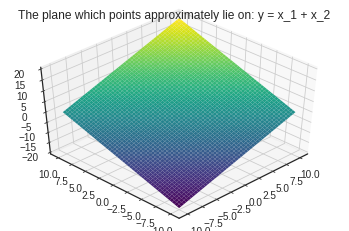

In [14]:
# Setting up and plotting the plane that points approximately lie on
def problem2_plane(x_1,x_2):
  return x_1 + x_2

x_1 = np.linspace(-10, 10)
x_2 = np.linspace(-10, 10)

X_1, X_2 = np.meshgrid(x_1, x_2)
Y = problem2_plane(X_1, X_2)

ax = plt.axes(projection='3d')
ax.plot_surface(X_1, X_2, Y, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('The plane which points approximately lie on: y = x_1 + x_2');

ax.view_init(45, 225)

Generate random data

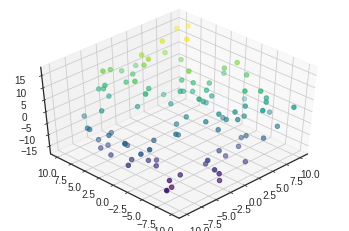

In [15]:
# Create random data.

m = 100

# Create data corresponding to 100 random (x_1, x_2, y) triples,
# with x_1 and x_2 both being values in [-10, 10).
# The y value for each triple is equal to the y value such that
# y = x_1 + x_2 for the corresponding x_1 and x_2, plus a random offset in [-1, 1).

X_1 = 20 * np.random.random_sample(m) - 10
X_2 = 20 * np.random.random_sample(m) - 10
Y = X_1 + X_2 +  2 * np.random.randn(m) - 1

ax = plt.axes(projection='3d')
ax.scatter3D(X_1, X_2, Y, c=Y, cmap='viridis');

ax.view_init(45, 225)

For this, the multivariate linear regression predicts $\hat{y}=b + w_1 x_1 + w_2x_2$ = $w\boldsymbol{\cdot} x$.

Perform linear regression with mini-batch gradient descent

In [16]:
initial_weight = np.random.randn(3, 1) 
X_new = np.array([[0], [1], [1]])
X_b = np.column_stack([np.ones((m, 1)), X_1, X_2])
X_new_b = np.column_stack([np.ones((3, 1)), X_new])

def plot_gradient_descent(weight, lr, weight_path=None):
    # plot training data
    plt.plot(X_1, X_2, y, "b.")
    # plot initial prediction
    y_predict = X_new_b.dot(weight)
    plt.plot(X_new, y_predict, "r--")
    
    if weight_path is not None:
      weight_path.append(weight)

    for epoch in range(epochs):
        gradient = 1 / m * X_b.T.dot(X_b.dot(weight) - y)
        weight = weight - lr * gradient
        if weight_path is not None:
            weight_path.append(weight)
        # plot prediction after weight update
        y_predict = X_new_b.dot(weight)
        plt.plot(X_new, y_predict, "b-")
        
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title("lr {}".format(lr), fontsize=16)

plot_gradient_descent(initial_weight, 0.1, [])

NameError: ignored

# Problem 3

Load the dataset

In [0]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

Add up all the matrices for each label and divide each resulting matrix by the number of matrices with that label, and output

Average MNIST digit with label 0:


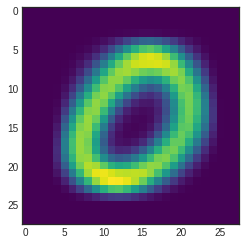

Average MNIST digit with label 1:


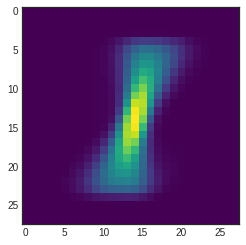

Average MNIST digit with label 2:


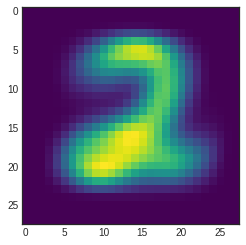

Average MNIST digit with label 3:


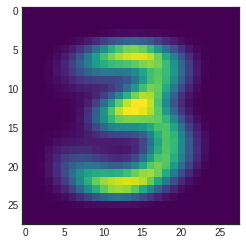

Average MNIST digit with label 4:


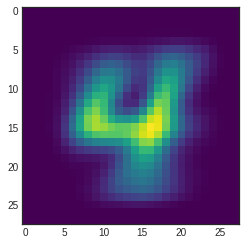

Average MNIST digit with label 5:


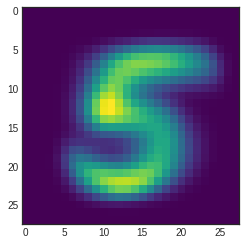

Average MNIST digit with label 6:


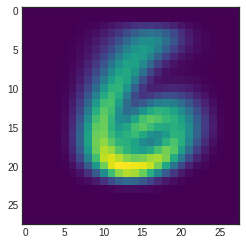

Average MNIST digit with label 7:


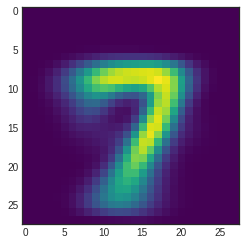

Average MNIST digit with label 8:


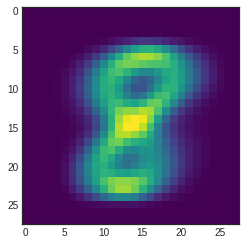

Average MNIST digit with label 9:


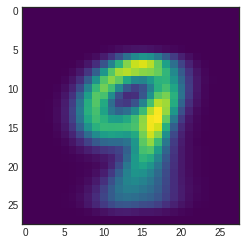

In [18]:
num_train_images = train_images.shape[0]
num_test_images = test_images.shape[0]

# Create a list for each label that will have all of the matrices that have that label.
image_lists_for_each_label = []
for label in range(0, 10):
  image_lists_for_each_label.append([])

# Put all the matrices in the training set into their respective label list.
for i in range(0, num_train_images):
  matrix = train_images[i]
  label = train_labels[i]
  image_lists_for_each_label[label].append(matrix)

# Put all the matrices in the test set into their respective label list.
for i in range(0, num_test_images):
  matrix = test_images[i]
  label = test_labels[i]
  image_lists_for_each_label[label].append(matrix)

for label in range(0, 10):
  # Start with a matrix of zeros.
  result_matrix = np.zeros((28, 28), dtype='int32')
  # Add each matrix that has this label.
  for matrix in image_lists_for_each_label[label]:
    result_matrix = np.add(result_matrix, matrix)

  # Get the number of matrices that have this label and divide to get the
  # final matrix for this label.
  number_of_matrices_for_this_label = len(image_lists_for_each_label[label])
  result_matrix = np.divide(result_matrix, number_of_matrices_for_this_label)

  # Output.
  print("Average MNIST digit with label " + str(label) + ":")
  plt.figure(figsize=(4, 4))
  plt.imshow(result_matrix, cmap='viridis')
  plt.show()

# Sources

https://colab.research.google.com/drive/1pcvtvK6jITbp1Sf2nD2uEaDGpwUOA3IL

https://colab.research.google.com/drive/1btvbObh-nZ4MSC7QkjpS3RGpefN_msth

https://colab.research.google.com/drive/1HDZB0sEjhd0sdTFNCmJXvB8hYnE9KBM7

https://colab.research.google.com/drive/1qBxfTPoNcSFvpwu1NDl1V6cHEqL3aQl-

https://www.youtube.com/watch?v=4qJaSmvhxi8

https://towardsdatascience.com/machine-learning-bit-by-bit-multivariate-gradient-descent-e198fdd0df85

https://medium.com/@DataStevenson/pokemon-stats-and-gradient-descent-for-multiple-variables-c9c077bbf9bd